# CSCI 3352 Project

**Names:** Tom Stoughton, Dylan Smith

Summary: ...

In [1]:
# network/comp. bio. packages
import networkx as nx
import cobra
from cobra.io import read_sbml_model
import netwulf
from netwulf import visualize

# helper packages
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# set up networks here

# can iterate over model.reactions and model.metabolites to construct bipartite directed network
def makeNetworkFromSBML(model):
    G = nx.DiGraph()
    nodes_m = {}
    nodes_r = {}

    for metabolite in model.metabolites:
        nodes_m[metabolite.id] = metabolite.formula
        
    for reaction in model.reactions:
        nodes_r[reaction.id] = reaction.name
    
    # add nodes with metabolite formula/enzyme name as attribute for id
    G.add_nodes_from([(m_id, {'formula': formula}) for (m_id, formula) in nodes_m.items()], bipartite=0)
    G.add_nodes_from([(r_id, {'name': name}) for (r_id, name) in nodes_r.items()], bipartite=1)
    
    edges = []
    for reaction in model.reactions:
        # get products and reactants
        products  = reaction.products
        reactants = reaction.reactants
        enzyme = reaction.name
        rid = reaction.id
        
        for p in products:
            edges.append((rid, p.id))
            if reaction.reversibility:
                edges.append((p.id, rid))
                
        for r in reactants:
            edges.append((r.id, rid))
            if reaction.reversibility:
                edges.append((rid, r.id))
            
        
    G.add_edges_from(edges)
    return G

model = read_sbml_model("protein.sbml")

MIN = makeNetworkFromSBML(model)


In [3]:
print(MIN)

DiGraph with 905 nodes and 3487 edges


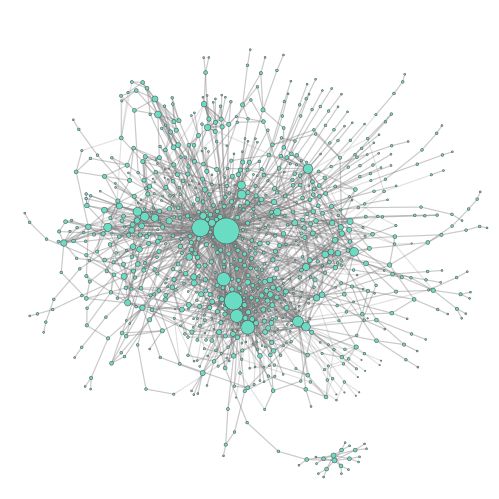

In [4]:
netw, _ = visualize(MIN)

In [8]:
m = model.metabolites.query("H2O", attribute="formula")[0]
print(m)

model.reactions[0].metabolites

cpd00001_c


{<Metabolite cpd00001_c at 0x7a3182d04ee0>: -1.0,
 <Metabolite cpd00002_c at 0x7a3182d04f10>: -2.0,
 <Metabolite cpd00053_c at 0x7a3182d04c10>: -1.0,
 <Metabolite cpd00242_c at 0x7a3182d04af0>: -1.0,
 <Metabolite cpd00008_c at 0x7a3182d04a30>: 2.0,
 <Metabolite cpd00009_c at 0x7a3182d04a90>: 1.0,
 <Metabolite cpd00023_c at 0x7a3182d04be0>: 1.0,
 <Metabolite cpd00067_c at 0x7a3182d04a60>: 2.0,
 <Metabolite cpd00146_c at 0x7a3182d04bb0>: 1.0}

In [40]:
model.reactions[4].name

'Itp:D-Tagatose 6-Phosphate 1-Phosphotransferase'

In [41]:
model.reactions[4].id

'rxn32571_c'

In [46]:
model.reactions[1].reversibility

True

In [21]:
model.reactions[1].products

[<Metabolite cpd00008_c at 0x7b32a616b4c0>,
 <Metabolite cpd00146_c at 0x7b32a616ba90>]

In [4]:
# numerical optimization code

In [ ]:
# clustering analysis